# Hello World Tutorial (YouTube Qiskit)

## Step 1: Map the probelm to the circuits and operators

In [1]:
from qiskit import QuantumCircuit

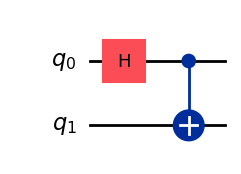

In [2]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

In [3]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

# Step 2: Optimize

# Step 3: Execute on the backend

In [5]:
from qiskit_aer.primitives import Estimator

In [7]:
estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

In [8]:
job.result()

EstimatorResult(values=array([ 1.        , -0.00976562, -0.00976562,  1.        , -0.00195312,
       -0.00195312]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0038593, 'sample_measure_time': 0.00079, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8048, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999046325683594, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0038593, 'sample_measure_time': 0.00079, '

## Step 4: Post-process (and plotting)

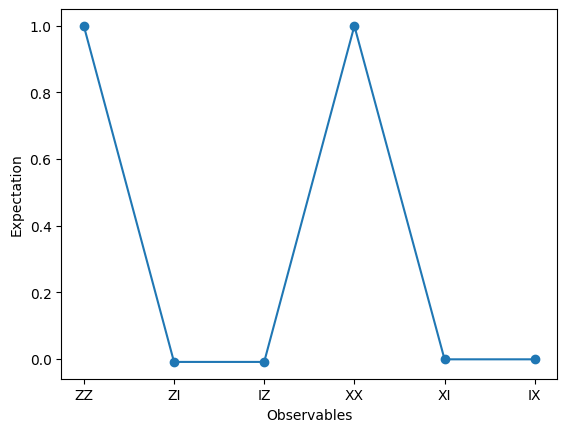

In [9]:
import matplotlib.pyplot as plt

data = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation')
plt.show()

# Extend the Hello World example to an $n$ qubit GHZ state

## Step 1: Map the problemm to circuits and operators

In [14]:
def get_qc_for_n_ghz_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc


n = 100
qc = get_qc_for_n_ghz_state(n)


In [15]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ["Z" + "I" * i + "Z" + "I" * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [16]:
operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]

## Step 2: Optimize the problem for quantum execution

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_torino"
backend = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-06 17:35:35,267: Default instance not set. Searching all available instances.


## Step 3: Execute on the backend

In [23]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions


options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type =  "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()

In [24]:
print(job_id)

d1l9hlna572c73974bn0


## Step 4: Post-process and plot

In [25]:
service = QiskitRuntimeService()

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-07-06 17:42:12,988: Default instance not set. Searching all available instances.


In [26]:
import matplotlib.pyplot as plt

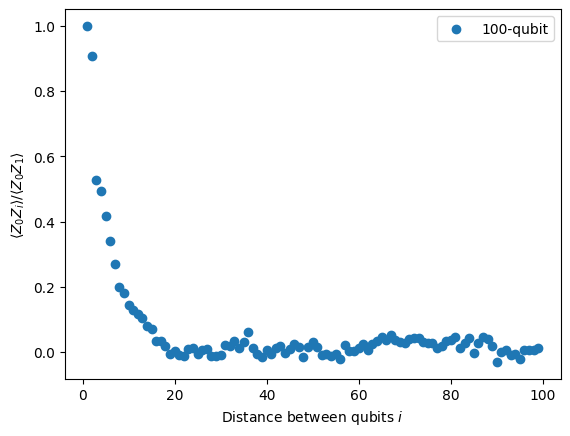

In [28]:
data = list(range(1, len(operators)+1))
result = job.result()[0]
values = result.data.evs

values = [v/values[0] for v in values]

plt.scatter(data, values, marker="o", label="100-qubit")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$")
plt.legend()
plt.show()